In [1]:
#importing various libraries and warnings option
import itertools
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')


In [2]:
#importing dataset
df = pd.read_csv('airline-passengers.csv', index_col='month', parse_dates=True)
#first 5 observation
df.head()

,total_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


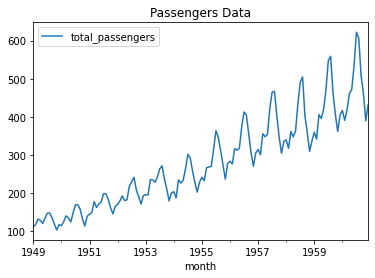

In [3]:
#visualization of passenger counts by years
df[['total_passengers']].plot(title='Passengers Data')
plt.show()


In [9]:
# let's express that index will be monthly
df.index.freq = "MS"
# then we split the dataset into as train and test sets. 
train = df[:120]
test = df[120:]


In [5]:
train.shape

(120, 1)

In [6]:
test.shape

(24, 1)

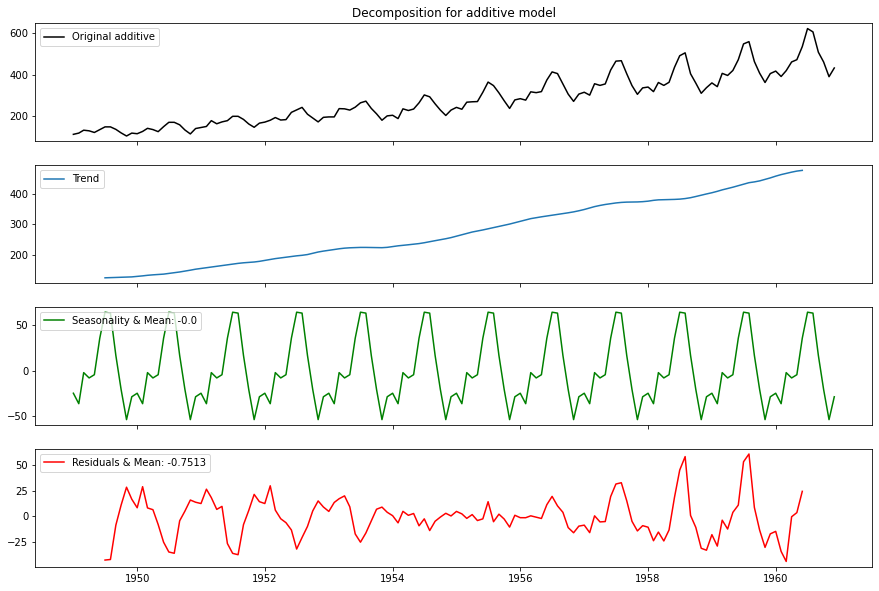

HO: Series is not stationary.
H1: Series is stationary.
Series is not stationary (0.991880243437641).


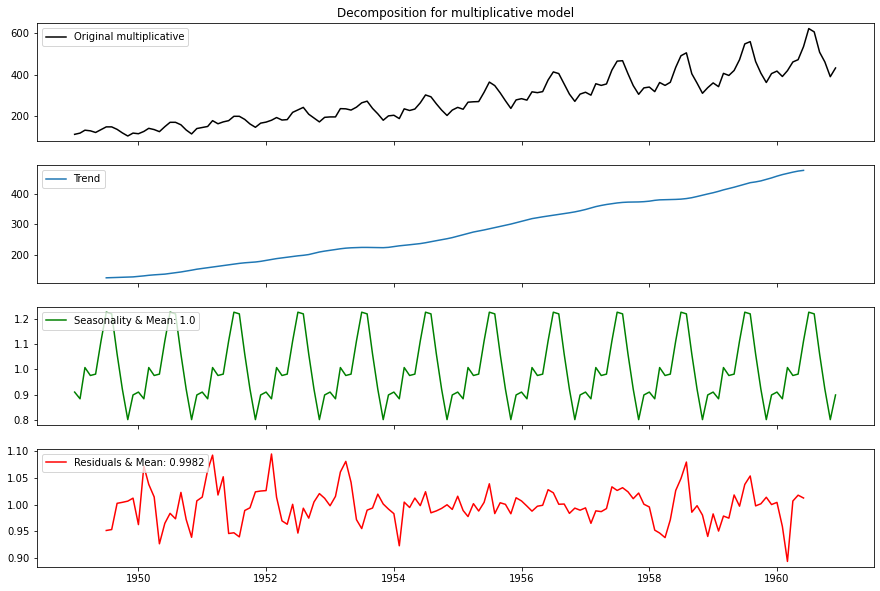

HO: Series is not stationary.
H1: Series is stationary.
Series is not stationary (0.991880243437641).


In [8]:
# time series decomposition
# splitting the time series into its components
def ts_decompose(y, model="additive", stationary=False):
    '''

    :param y: values of dataset
    :param model: additive or multiplicative
    :param stationary:stationary
    This function provides various information about the data set by visualizing the number of passengers by years, 
    trend, seasonality, residuals, and stationary. Also performs statistical testing for stationarity.
    The function allows us to analyze data both as a multiplicative and additive model. 
    Thus, it allows us to decide whether the model is additive or multiplicative.
    '''
    from statsmodels.tsa.seasonal import seasonal_decompose
    result = seasonal_decompose(y, model=model)
    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    # model plot: number of passengers
    axes[0].set_title("Decomposition for " + model + " model")
    axes[0].plot(y, 'k', label='Original ' + model)
    axes[0].legend(loc='upper left')
    # trend plot
    axes[1].plot(result.trend, label='Trend')
    axes[1].legend(loc='upper left')
    # seasonality plot
    axes[2].plot(result.seasonal, 'g', label='Seasonality & Mean: ' + str(round(result.seasonal.mean(), 4)))
    axes[2].legend(loc='upper left')
    # residual plot
    axes[3].plot(result.resid, 'r', label='Residuals & Mean: ' + str(round(result.resid.mean(), 4)))
    axes[3].legend(loc='upper left')
    plt.show()

    if stationary:  # hypothesis testing for stationary
        print("HO: Series is not stationary.")
        print("H1: Series is stationary.")
        p_value = sm.tsa.stattools.adfuller(y)[1]
        if p_value < 0.05:
            print(F"RESULT: Series is stationary ({p_value}).")
        else:
            print(F"Series is not stationary ({p_value}).")


# calling function
for model in ["additive", "multiplicative"]:
    ts_decompose(df[['total_passengers']], model, True)




Seasonality and residuals are distributed independently of the trend, errors are distributed at the 0 average. So the series is additive